# **Principal Component Analysis Data vs Original Data**

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Loading Data**

In [2]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
X = df.drop('target', axis=1)
y = df['target']

**Train Test Split**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Data Preprocessing**

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train and evaluate a model on the original dataset**

In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred)
print(f'Accuracy on original dataset: {accuracy_original:.2f}')


Accuracy on original dataset: 1.00


**Apply PCA and reduce to 2 components**

In [7]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


**Train and evaluate a model on the PCA-transformed dataset**

In [8]:
model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy on PCA-transformed dataset: {accuracy_pca:.2f}')


Accuracy on PCA-transformed dataset: 0.98


# **Visualizations**

**Correlation matrix for original data**

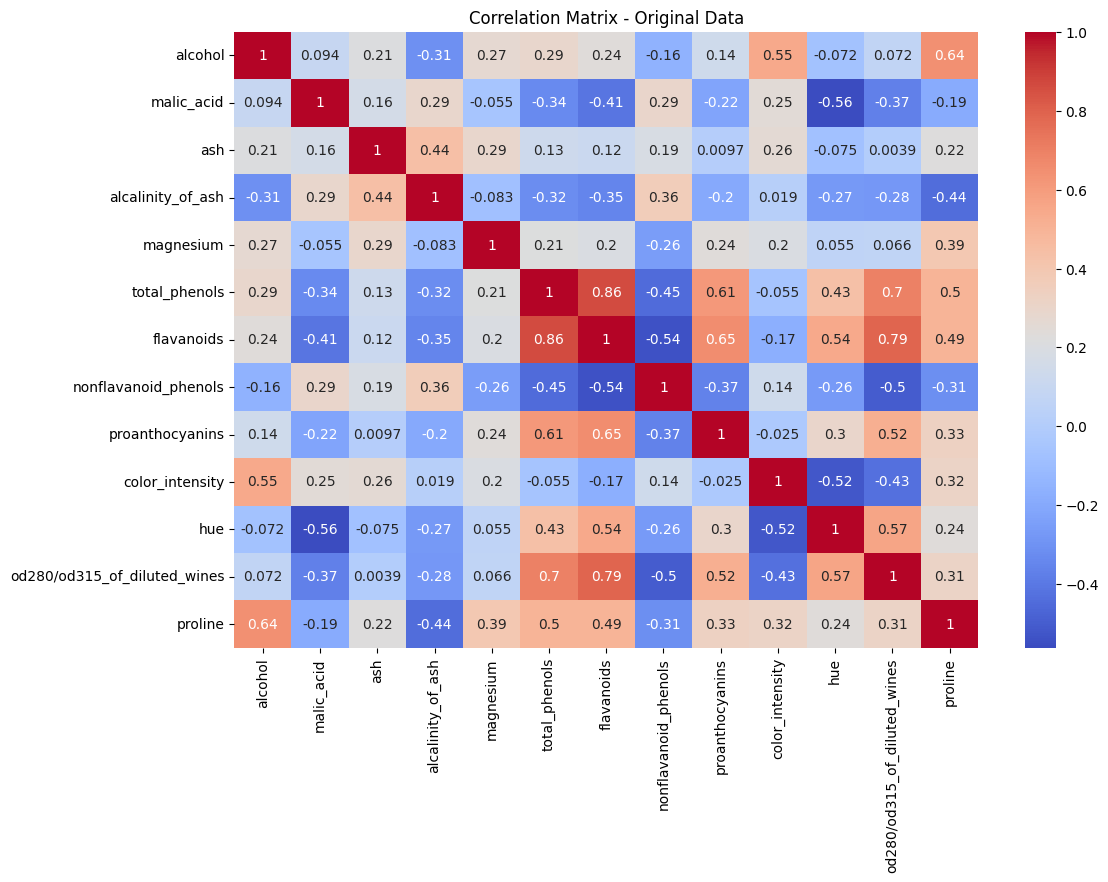

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop('target', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Original Data')
plt.show()

**Covariance matrix for original data**

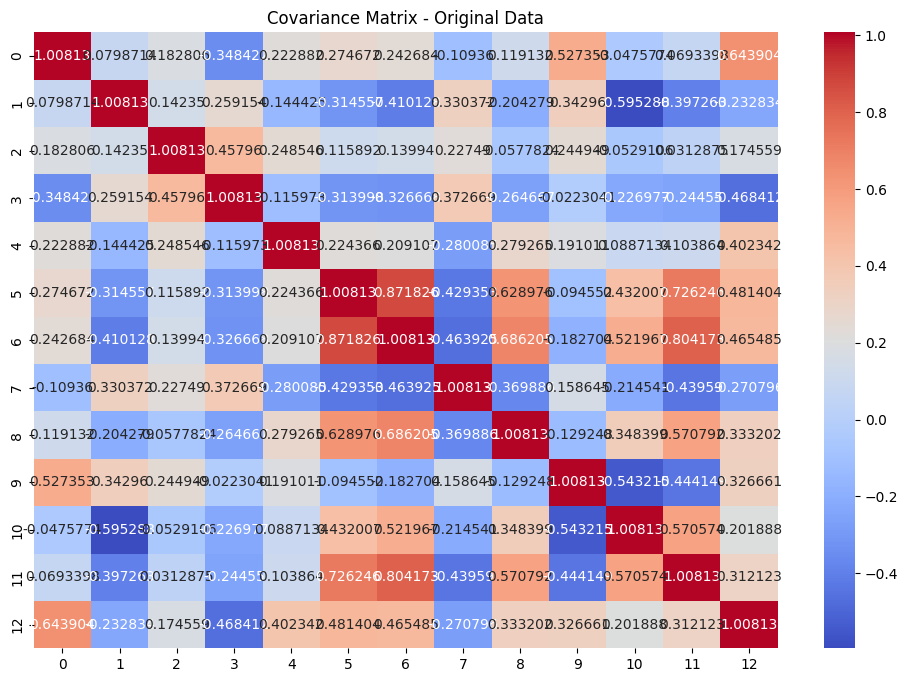

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(np.cov(X_train_scaled.T), annot=True, cmap='coolwarm', fmt='g')
plt.title('Covariance Matrix - Original Data')
plt.show()

**Explained variance ratio for PCA components**


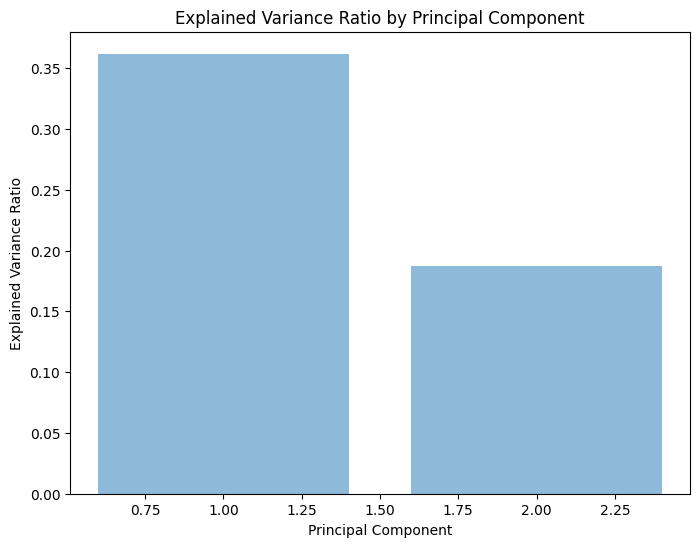

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


**Correlation matrix for PCA-transformed data**

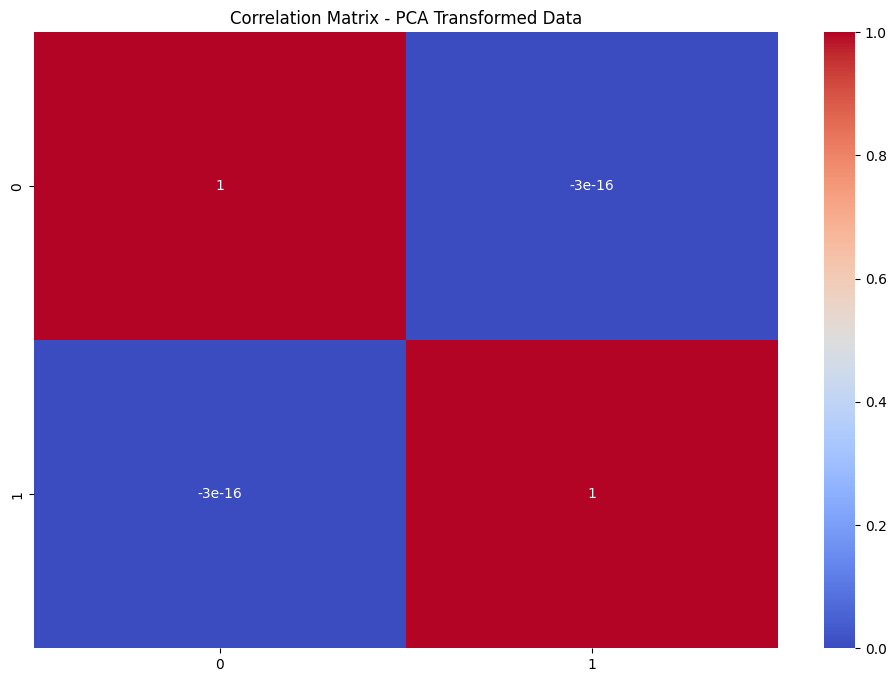

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_train_pca).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - PCA Transformed Data')
plt.show()

**Covariance matrix for PCA-transformed data**

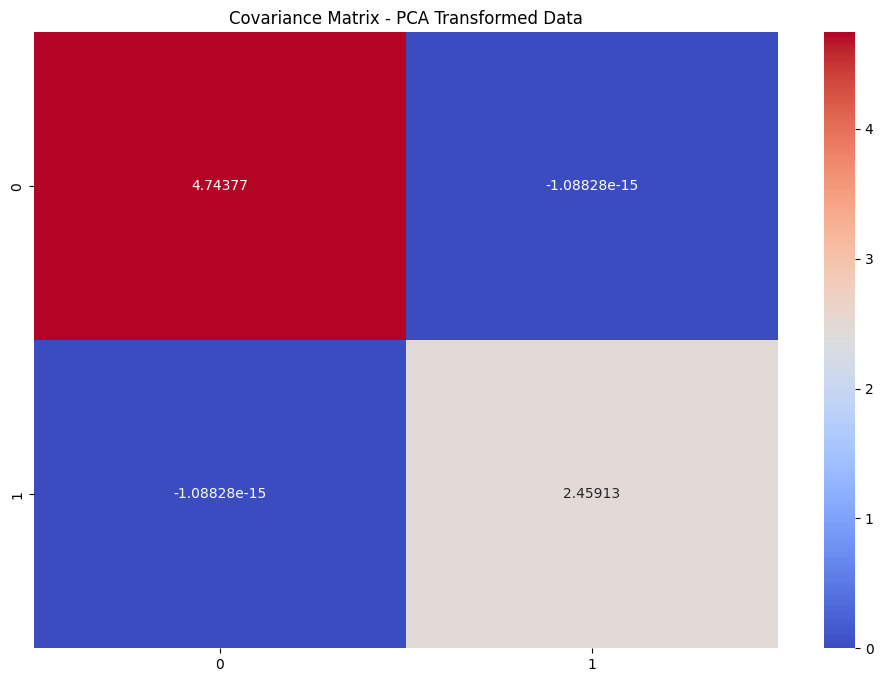

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(np.cov(X_train_pca.T), annot=True, cmap='coolwarm', fmt='g')
plt.title('Covariance Matrix - PCA Transformed Data')
plt.show()

# **Comparing Accuracies**

In [14]:
accuracies = {'Original Data': accuracy_original, 'PCA Transformed Data': accuracy_pca}
names = list(accuracies.keys())
values = list(accuracies.values())


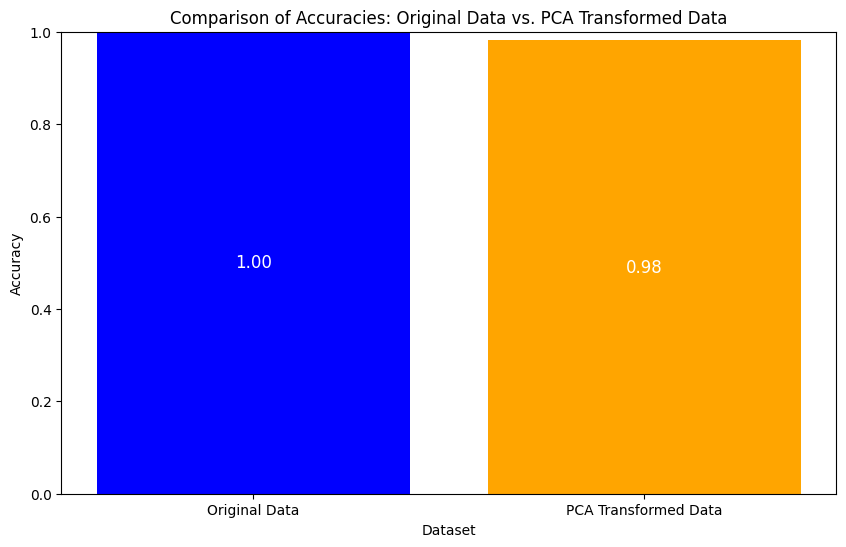

In [15]:
plt.figure(figsize=(10, 6))
bars = plt.bar(names, values, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies: Original Data vs. PCA Transformed Data')

for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{value:.2f}', ha='center', va='center', color='white', fontsize=12)

plt.ylim(0, 1)
plt.show()